In [3]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
iris = load_iris()

X = iris.data
y = iris.target

In [6]:
#K fold cross validation with k= 5 and folds = 10
knn = KNeighborsClassifier(n_neighbors= 5)
scores = cross_val_score(knn,X,y,cv= 10, scoring= 'accuracy')
print(scores)

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


In [54]:
#get the mean score
round(np.mean(scores),3)

0.953

In [10]:
# getting the optimal value for K
k_range = range(1,41)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,X,y,cv = 10, scoring= 'accuracy')
    k_scores.append(np.mean(scores))
print(k_scores)    

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9533333333333334, 0.9533333333333334]


Text(0, 0.5, 'K score')

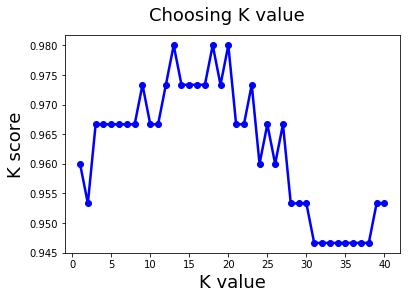

In [16]:
# plot to see the best k value
c = [i for i in range(1,41,1)]

fig = plt.figure(figsize= (6,4))
plt.plot(c,k_scores,color = 'blue', linewidth = 2.5, linestyle = '-', marker = 'o')
fig.suptitle('Choosing K value', fontsize = 18)
plt.xlabel('K value', fontsize = 18)
plt.ylabel('K score', fontsize = 18)

In [18]:
from sklearn.model_selection import GridSearchCV

In [37]:
#define the parameter values that need to be searched
c = [i for i in range(1,41)]
k_range = c
param_grid = dict(n_neighbors = k_range)

print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]}


In [38]:
#instantiate the grid

grid = GridSearchCV(knn, param_grid, cv = 10, scoring= 'accuracy', n_jobs= -1)

## n_jobs = -1 is for running the parallel processing

In [39]:
grid.fit(X,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=40, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [42]:
# view the results
print(grid.cv_results_)

{'mean_fit_time': array([0.00089917, 0.0007997 , 0.0009995 , 0.00089948, 0.00079889,
       0.00109925, 0.00139914, 0.00099933, 0.00069969, 0.00069962,
       0.00059965, 0.00079975, 0.00079968, 0.00109944, 0.00079975,
       0.00069964, 0.00079961, 0.00079961, 0.00069971, 0.00079966,
       0.00089972, 0.00079949, 0.00069973, 0.00069985, 0.00069964,
       0.00069942, 0.00059969, 0.00099916, 0.00069957, 0.00079951,
       0.00079944, 0.00069959, 0.00019984, 0.00069971, 0.00049996,
       0.00029976, 0.        , 0.0006994 , 0.00089955, 0.00059969]), 'std_fit_time': array([5.37451146e-04, 3.99852023e-04, 8.24528526e-07, 2.99828309e-04,
       3.99447327e-04, 6.99363474e-04, 1.56075846e-03, 7.78063243e-07,
       4.58052813e-04, 4.58006040e-04, 4.89609517e-04, 3.99875996e-04,
       3.99840218e-04, 1.69899329e-03, 3.99875698e-04, 4.58021616e-04,
       3.99804225e-04, 5.99646708e-04, 4.58068471e-04, 3.99828170e-04,
       2.99907072e-04, 3.99744851e-04, 4.58084164e-04, 4.58162045e-04,
  

In [50]:
type(grid.cv_results_)

sklearn.utils.deprecation.DeprecationDict

In [51]:
df = pd.DataFrame(grid.cv_results_)

In [53]:
df.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.000899,0.000537,0.002099,0.001374,1,{'n_neighbors': 1},1.0,0.933333,1.0,0.933333,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.000800,0.000400,0.001200,0.000399,2,{'n_neighbors': 2},1.0,0.933333,1.0,0.933333,...,0.977778,0.985185,0.977778,0.97037,0.985185,0.977778,0.977778,0.977778,0.978519,0.005185


In [58]:
df[['params','mean_train_score']]

,params,mean_train_score
0,{'n_neighbors': 1},1.000000
1,{'n_neighbors': 2},0.978519
2,{'n_neighbors': 3},0.960741
3,{'n_neighbors': 4},0.963704
4,{'n_neighbors': 5},0.968889
5,{'n_neighbors': 6},0.972593
6,{'n_neighbors': 7},0.973333
7,{'n_neighbors': 8},0.979259
8,{'n_neighbors': 9},0.979259
9,{'n_neighbors': 10},0.976296


Text(0.5, 0.98, 'Grid Accuracy Measure')

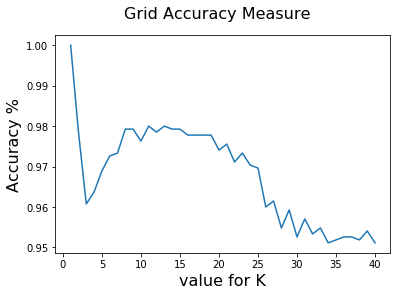

In [62]:
#plotting the results
c = [i for i in range(1,41,1)]
plt.plot(c,df['mean_train_score'])
plt.xlabel('value for K',fontsize = 16)
plt.ylabel('Accuracy %', fontsize = 16)
plt.suptitle('Grid Accuracy Measure', fontsize = 16)

In [64]:
#examine the  best model parameters
print('Best Score: {}'.format(grid.best_score_))
print('Best Parsms: {}'.format(grid.best_params_))
print('Best Estimator: {}'.format(grid.best_estimator_))

Best Score: 0.98
Best Parsms: {'n_neighbors': 13}
Best Estimator: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=13, p=2,
           weights='uniform')


# Searching for multiple paramaters at the same time

Below are all the parameters for KNN, we will search for K value  and Weight Options
Type:        KNeighborsClassifier
String form:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=40, p=2,
           weights='uniform')

In [65]:
#define the search params
c = [i for i in range(1,41,1)]
k_range = c
weight_options = ['uniform','distance']

In [66]:
#create the parameter dict
param_dict = dict(n_neighbors= k_range,weights=weight_options)

In [67]:
print(param_dict)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], 'weights': ['uniform', 'distance']}


In [68]:
#run the grid search
grid = GridSearchCV(knn, param_grid= param_dict, cv = 10, scoring= 'accuracy')
grid.fit(X,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=40, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [69]:
#covert to pandas data frame
df2 = pd.DataFrame(grid.cv_results_)

In [70]:
df2.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.004597,0.012799,0.011093,2.963176e-02,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",1.0,0.933333,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.000500,0.000500,0.000999,2.622604e-07,1,distance,"{'n_neighbors': 1, 'weights': 'distance'}",1.0,0.933333,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.000500,0.000500,0.000800,3.999003e-04,2,uniform,"{'n_neighbors': 2, 'weights': 'uniform'}",1.0,0.933333,1.0,...,0.977778,0.985185,0.977778,0.970370,0.985185,0.977778,0.977778,0.977778,0.978519,0.005185
3,0.000500,0.000500,0.000600,4.897849e-04,2,distance,"{'n_neighbors': 2, 'weights': 'distance'}",1.0,0.933333,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,0.000500,0.000500,0.000999,2.431402e-07,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",1.0,0.933333,1.0,...,0.955556,0.962963,0.977778,0.955556,0.970370,0.955556,0.955556,0.955556,0.960741,0.007444


In [71]:
#get the idea about the scores
df2[['params','mean_train_score']]

,params,mean_train_score
0,"{'n_neighbors': 1, 'weights': 'uniform'}",1.000000
1,"{'n_neighbors': 1, 'weights': 'distance'}",1.000000
2,"{'n_neighbors': 2, 'weights': 'uniform'}",0.978519
3,"{'n_neighbors': 2, 'weights': 'distance'}",1.000000
4,"{'n_neighbors': 3, 'weights': 'uniform'}",0.960741
5,"{'n_neighbors': 3, 'weights': 'distance'}",1.000000
6,"{'n_neighbors': 4, 'weights': 'uniform'}",0.963704
7,"{'n_neighbors': 4, 'weights': 'distance'}",1.000000
8,"{'n_neighbors': 5, 'weights': 'uniform'}",0.968889
9,"{'n_neighbors': 5, 'weights': 'distance'}",1.000000


In [72]:
#examine the  best model parameters
print('Best Score: {}'.format(grid.best_score_))
print('Best Parsms: {}'.format(grid.best_params_))
print('Best Estimator: {}'.format(grid.best_estimator_))

Best Score: 0.98
Best Parsms: {'n_neighbors': 13, 'weights': 'uniform'}
Best Estimator: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=13, p=2,
           weights='uniform')


# Now we can train the model with best parameters settings from gridsearch and then get some random predictions

In [78]:
# train the model with best parameters found
knn = KNeighborsClassifier(n_neighbors= 13, weights= 'uniform')

knn.fit(X,y)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=13, p=2,
           weights='uniform')

In [83]:
# make predictions
knn.predict([[5.4, 3.9, 1.7, 0.4]])


array([1])

In [84]:
knn.predict([[3,5,4,2]])

array([1])

In [88]:
knn.predict([[6,3,1,0]])

array([0])

## Now we can use this trained model with best params to get our predictions